In [1]:
#edge_detection_sobel
#amaç=iki resme bakarak renk değişimlerinin nerelerde olduğunu yakalamak için bir şekil sayısal türev işlemi.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d

In [7]:
file_path_1=r"C:\Users\hbcic\image_proses_fotograflar\deneme.jpeg"
im_1=plt.imread(file_path_1)
im_2=convert_rgb_to_gray_level(im_1)
file_path_2=r"C:\Users\hbcic\penguins_1.jpg"
im_3=plt.imread(file_path_2)
im_4=convert_rgb_to_gray_level(im_3)

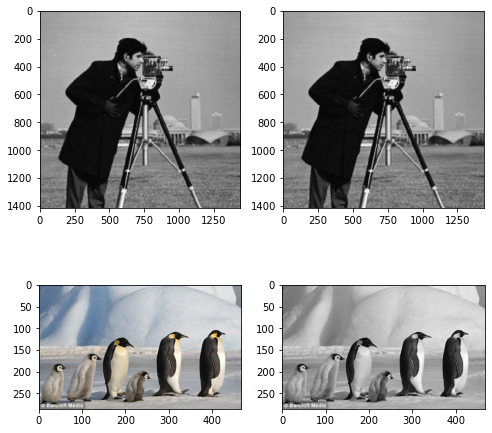

In [11]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1),plt.imshow(im_1)
plt.subplot(2,2,2),plt.imshow(im_2,cmap='gray')
plt.subplot(2,2,3),plt.imshow(im_3)
plt.subplot(2,2,4),plt.imshow(im_4,cmap='gray')
plt.show()

In [12]:
def get_mask_for_edge():#3'e 3'lük bir kenara uygulanacak mask işlemi için.
    return np.array([-1,0,1,-2,0,2,-1,0,1]).reshape(3,3)
get_mask_for_edge()
#3'e 3'lük grupta türev alacak. Kat sayılara eksi artı vererek yatay dikey türev bul.

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [13]:
#karşılıklı olarak mask ile çarp ve sonra sum al.
#part_of_image=resimden gelen blok
def apply_mask_for_edge(part_of_image):
    mask=get_mask_for_edge()
    return sum(sum(part_of_image*mask)) 

In [14]:
poi_1=get_mask_for_edge()#deneme yaptık
apply_mask_for_edge(poi_1)

12

In [15]:
#Resme yukarıdakileri uyarlama işlemi.
def get_edges(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    
    im_2=np.zeros((m,n))
    
    for i in range(3,m-3): #3'lük blok için
        for j in range(3,n-3):
            poi=im_1[i-1:i+2,j-1:j+2]
            
            im_2[i,j]=apply_mask_for_edge(poi)
    return im_2

In [20]:
im_with_edges_1=get_edges(im_2)
im_with_edges_2=get_edges(im_4)

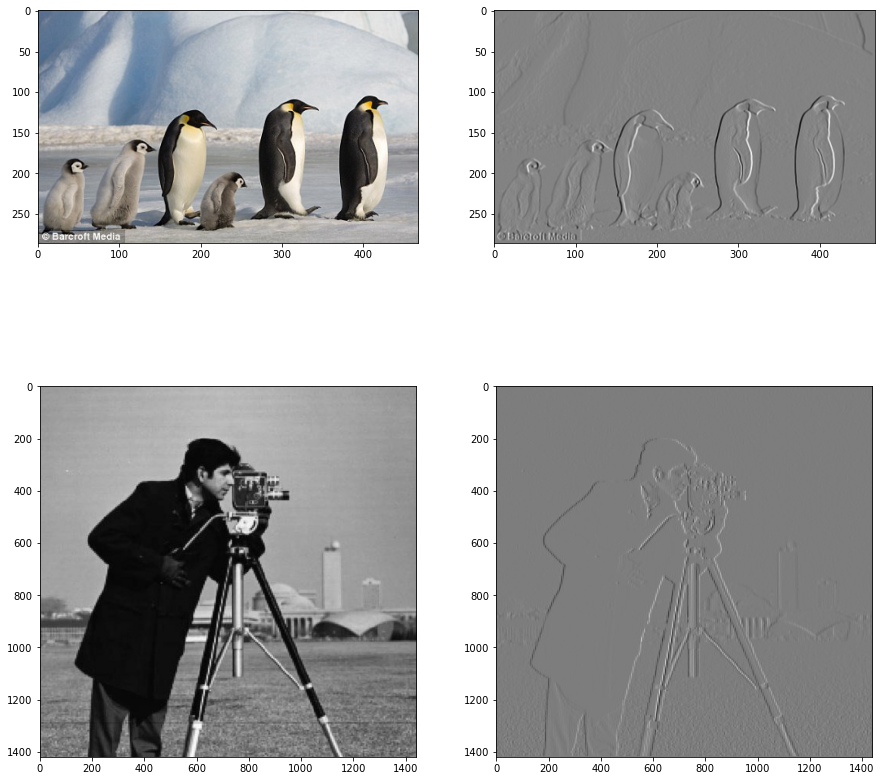

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,3),plt.imshow(im_1)
plt.subplot(2,2,4),plt.imshow(im_with_edges_1,cmap='gray')
plt.subplot(2,2,1),plt.imshow(im_3)
plt.subplot(2,2,2),plt.imshow(im_with_edges_2,cmap='gray')
plt.show()